In [1]:

import pandas as pd
import numpy as np

In [2]:
# First, import the class data
data = pd.read_excel("../../data/class.xlsx")
data.head()

,First Name,Gender,Height,Weight,Age,Nationality,Smoking (cig/day),Coffee (cups/day),Drink (drinks/week),Exercise (hours/week)
0,A,M,150,70,30,Greek,0,2,2,7
1,B,M,170,80,50,Atlantian,0,0,10,0
2,C,F,210,90,18,USA,1,1,2,20
3,D,M,180,80,19,Greece,0,0,0,3
4,E,F,160,60,21,American,0,0,0,0


In [3]:
# Try to predict weight from height
X = data["Height"]
Y = data["Weight"]

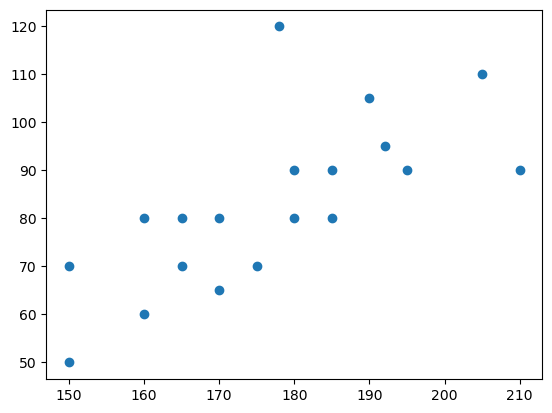

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)


In [5]:
# Calculate the mean-square loss over all examples
def mse_loss(f, X, Y):
    mse = 0
    for t in range(len(Y)):
        a = f.predict(X[t])
        mse += (a - Y[t])**2
        #print(X[t], Y[t], a)
    return mse / len(Y)


In [6]:
# We define linear functions as a class for simplicity of implem,entation
class LinearFunction:
    def __init__(self, n):
        self.params = np.zeros(n)
        self.n_in = n
    def predict(self, x):
        return np.dot(self.params, x)

# One-dimensional example

Here we just look at single parameter prediction functions

$$f_\beta(x) = \beta x,$$

with $x, \beta \in \mathbb{R}$. So there is only one input and one parameter. This allows us to visualise the MSE on the data for different values of $\beta$:

$$L(D, \beta) = \frac{1}{|D|}\sum_{(x,y) \in D} \ell(f_\beta(x), y),$$

with $\ell(a, y) = (a - y)^2$.



In [15]:
# HEre we calculate the MSE of that function for different values of beta
a = 0
n_samples = 10
beta = np.arange(0, n_samples)/n_samples
mse = np.zeros(n_samples)
for k in range(n_samples):
    fun = LinearFunction(1)
    fun.params[0] = beta[k]
    mse[k] = mse_loss(fun, X, Y)
    
beta_min = beta[np.argmin(mse)]

Text(0.5, 1.0, 'MSE loss for $f_\\beta(x) = \\beta x$')

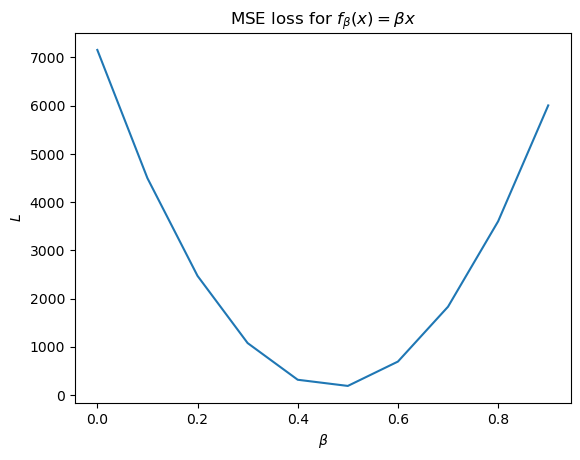

In [16]:
plt.plot(beta, mse)
plt.xlabel("$\\beta$")
plt.ylabel("$L$")
plt.title("MSE loss for $f_\\beta(x) = \\beta x$")

Best beta value: 0.5


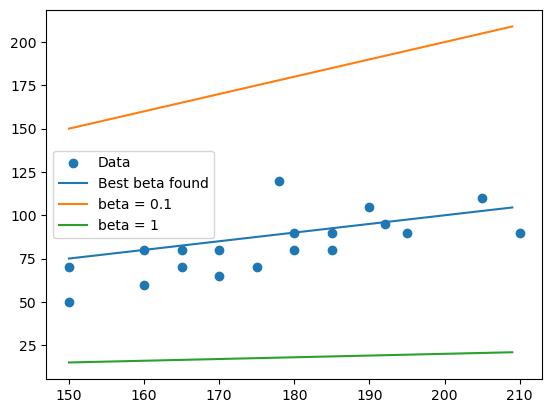

In [24]:
plt.scatter(X, Y)
x_range = np.arange(min(X), max(X))
fun = LinearFunction(1)
fun.params[0] = beta_min
y_range = [fun.predict(x) for x in x_range]
plt.plot(x_range, y_range)
print("Best beta value:", beta_min)
fun.params[0] = 1
y_range = [fun.predict(x) for x in x_range]
plt.plot(x_range, y_range)
fun.params[0] = 0.1
y_range = [fun.predict(x) for x in x_range]
plt.plot(x_range, y_range)
plt.legend(["Data", "Best beta found", "beta = 0.1", "beta = 1"])